# Chapter 4 Analysis of Variance
     

## 4.1 One-way ANOVA

### 4.1.1 A motivating example: the Spock trial

In 1968 Dr. Benjamin Spock was tried in Boston for conspiring against the government for helping young men to escape the military draft. He was convicted by the Boston federal court, but the judgement was overturned by the Court of Appeals in 1969 for many reasons, one of which was cited as the bias of the presiding judge Francis Ford. 

Dr. Spock, a pediatrician, was very famous for his books on rearing of children, and thus was widely admired by women. As a matter of fact, the jury in Spock trial has no women. Note that jury panels, though randomly selected, should reflect the demographics. 

In any particular trial, there may not be any woman on the jury, but it is worthwhile to examine if the jury panels of Judge Ford had fewer women than other judges in Boston in few months before the trial. Data are available for jury panels for 7, but we investigate the data for only 4 judges including Judge Ford. 

We can start our analysis with a visualization of the data set. 

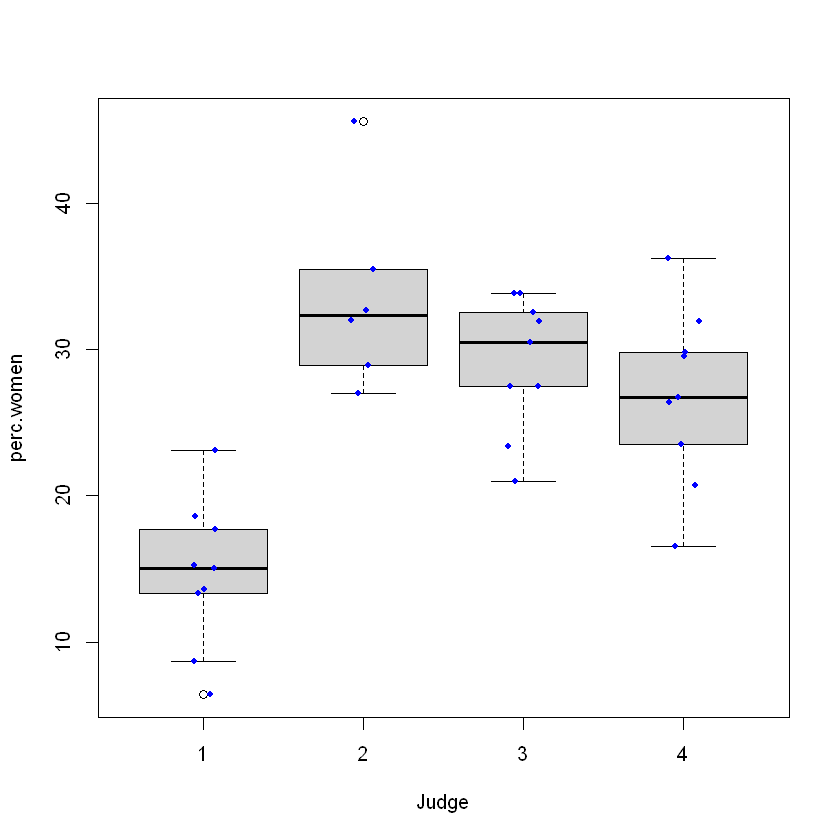

In [1]:
Spock <- read.csv(file="../Data/SpockTrial.csv", header=TRUE, sep=",")
Spock$Judge<-as.factor(Spock$Judge);
# Box plot with jittered points 
boxplot(perc.women~Judge,data=Spock)
stripchart(perc.women~Judge, vertical = TRUE, data = Spock,
    method = "jitter", add = TRUE, pch = 20, col = 'blue')

### 4.1.2 One-way ANOVA

In the Spock trial data, let $r=4$ denote the number of judges,  $Y_{ij}$ be the percentage of women in the $j$th panel for the $i$th judge. Let Judge 1 be the judge in the Spock trial. We can propose the following model, for $j=1,\ldots, n_i, i=1,\ldots, r$,
\[
Y_{ij}=\mu_i + \epsilon_{ij}, 
\]
where $\{\epsilon_{ij}\}$ are i.i.d. $N(0,\sigma^2)$. In the Spock trial data, $r=4$, $n_2=6$, and $n_1=n_3=n_4=9$. This model is a one-way **an**alysis **o**f **va**riance model in its cell means form.  We will discuss other forms later in this chapter.  

Because $n_1,n_2, n_3$ and $n_4$ are not equal, this is an imbalanced ANOVA model. If $n_1=n_2=\cdots=n_r$, then the ANOVA model is **balanced**.

In this model, $\mu_i$ represents the mean percentage of women in the panels for the $i$th judge, and $\sigma^2$ represents the variance in the percentages across panels. It is easy to see that, by using one $\sigma^2$ across all judges, we assume the panels of all four judges have the same amount of variability. 

The question of interest in the Sproch trial data can now be translated to whether $\{\mu_i\}_{i=1}^r$ are the same, where $\{\mu_i\}$ and $\sigma^2$ are unknown. 


The estimators for $\mu_i, i=1,2,\ldots, r$ are simply the within-group sample means, i.e., for $i=1,\ldots, r$,
\[
\hat{\mu}_i = \bar{Y}_{i\cdot} = \frac{1}{n_i}\sum_{j=1}^{n_i} Y_{ij}.
\]
We have two observations on our estimators $\hat{\mu}_i$, $i=1,\ldots, r$. 
1. The estimator $\hat{\mu}_i$ is also the maximum likelihood estimator for $\mu_i$. 
2. $\hat{\mu}_i$ is the best linear unbiased estimator if $\{Y_{ij}\}$ are mutually uncorrelated but not necessarily normally distributed.

We can call the `aov()` function to fit a one-way ANOVA model in `R`. 

In [2]:
anova.fit<- aov(perc.women~Judge,data=Spock)
# Summary
summary(anova.fit)


            Df Sum Sq Mean Sq F value   Pr(>F)    
Judge        3 1591.3   530.4   17.61 1.06e-06 ***
Residuals   29  873.5    30.1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### 4.1.3 Sum of squares decomposition 

Define the residuals $e_{ij}=Y_{ij}-\hat{Y}_{ij}=Y_{ij}-\bar{Y}_{i\cdot}$, $j=1,2,\ldots, n_i$ and $i=1,2, \ldots, r$. 
From the model equation, we can see that $e_{ij}$ is an estimator of $\epsilon_{ij}$.

A simple identity holds that 
\[
Y_{ij}-\bar{Y}_{\cdot\cdot} = (\bar{Y}_{i\cdot}-\bar{Y}_{\cdot \cdot})+(Y_{ij}-\bar{Y}_{i\cdot}).
\]
Squaring both sides of the equation yields 
\begin{align}
\sum_{i=1}^r \sum_{j=1}^{n_i} \big(Y_{ij}-\bar{Y}_{\cdot \cdot}\big)^2 = & \sum_{i=1}^r \sum_{j=1}^{n_i} \big(\bar{Y}_{i\cdot}-\bar{Y}_{\cdot \cdot}\big)^2 +\sum_{i=1}^r \sum_{j=1}^{n_i} \big(Y_{ij}-\bar{Y}_{i \cdot}\big)^2\\
=  & \sum_{i=1}^r n_i \big(\bar{Y}_{i\cdot}-\bar{Y}_{\cdot \cdot}\big)^2 +\sum_{i=1}^r \sum_{j=1}^{n_i} \big(Y_{ij}-\bar{Y}_{i \cdot}\big)^2,
\end{align}
where the first equality holds because $2\sum_{i=1}^r\sum_{j=1}^{n_i} \big(\bar{Y}_{i\cdot}-\bar{Y}_{\cdot \cdot}\big)\big(Y_{ij}-\bar{Y}_{i \cdot}\big)=0$. 

Some terminologies:

<table style="width:100%">
  <tr>
    <th> </th>
    <th>Acronym</th>
    <th>Definition</th>
     <th>d.f.</th>
  </tr>
  <tr>
    <td>Total sum of squares </td>
    <td>SSTO</td>
    <td>$\sum_{i=1}^r \sum_{j=1}^{n_i} \big(Y_{ij}-\bar{Y}_{\cdot \cdot}\big)^2$</td>
    <td> $n_T-1$ </td>
  </tr>
  <tr>
    <td> Treatment sum of squares </td>
    <td>SSTR </td>
    <td >$\sum_{i=1}^r n_i \big(\bar{Y}_{i\cdot}-\bar{Y}_{\cdot \cdot}\big)^2$  </td>
    <td>  $r-1$ </td>
  </tr>
    <tr>
    <td> Residual sum of squares  </td>
    <td>  SSE  </td>
    <td> $\sum_{i=1}^r \sum_{j=1}^{n_i} \big(Y_{ij}-\bar{Y}_{i \cdot}\big)^2$ </td>
    <td>   $n_T-r$ </td>
    </tr>
</table>

We can see that 
\[
{\rm SSTO} \ = \ {\rm SSTR} \ +\ {\rm SSE}, \quad {\rm df(SSTO)}\ = \ {\rm df(SSTR)} \ + \ {\rm df(SSE)}.
\]

We can define the mean squares accordingly, 
\begin{align}
{\rm MSTR}\ = & \ {\rm SSTR}/{\rm df(SSTR)} \ = &  \ {\rm SSTR}/(r-1)\\
{\rm MSE}\ = & \ {\rm SSE}/{\rm df(SSE)} \ = &  \ {\rm SSE}/(n_T-r)\\
{\rm MSTO}\ = & \ {\rm SSTO}/{\rm df(SSTO)} \ = &  \ {\rm SSTO}/(n_T-1)
\end{align}

### 4.1.4 Alternative forms of ANOVA

**Factor effect form**

Let $\mu=\sum_{i=1}^r w_i \mu_i$ and $\tau_i = \mu_i -\mu$. Then $\sum_{i=1}^r w_i \tau_i=0$. We can rewrite the ANOVA model as 
\[
Y_{ij}=\mu+\tau_i+\epsilon_{ij}, 
\]
where $\{\epsilon_{ij}\}$ are i.i.d. $N(0,\sigma^2)$. 

The least squares estimators are $\hat{\mu}=\sum_{i=1}^r w_i \bar{Y}_{i\cdot}$ and $\hat{\tau}_i = \bar{Y}_{i\cdot} -\hat{\mu}$. 

Notes in `R`:
1. One of $\tau_i$ is set to zero by default.
2. `R` assumes $w_i=n_i/n_T$  for one-way ANOVA, but equal weights for higher-order ANOVAs. 
    
**Regression form**
  
There are multiple equivalent forms to turn a cell-mean model into the typical linear regression form. 
In the Spock trial data, the regression equation takes the following form, for $j=1,\ldots, n_i,\ \quad i=1,\ldots, 4,$ 
 \[
  Y_{ij}=\mu +\tau_2 X_{2,ij}+\tau_3 X_{3,ij} + \tau_4 X_{4,ij} +\epsilon_{ij}. 
 \]
where $\{\epsilon_{ij}\}$ are i.i.d. $N(0,\sigma^2)$. But there are multiple choices in the coding of $\{X_{1,ij},\ldots, X_{4,ij}\}$. 
1. _Dummy variables_, e.g., $X_{l,ij}=1$ when $l=i$, and 0 otherwise. 
2. For $l=1,2,3$,  $X_{l,ij}=1$ when $i=l$, $X_{l,ij}=-1$ when $i=4$, and $X_{l,ij}=0$ otherwise. This is equivalent form for an ANOVA model with equal weights. 
3. For $l=1,2,3$, $X_{l,ij}=1$ when $l=i$, $X_{l,ij}=-n_l/n_4$ when $i=4$, and $X_{l,ij}=0$ otherwise. This is equivalent to an ANOVA model with unequal weights. 

It is easy to see that all three regression models are equivalent, since they are all equivalent forms of the same ANOVA model. However, the interpretations of the model parameters (i.e., $\tau$s) may differ slightly.

### 4.1.5 Gauss-Markov properties

We assume that $Y=X\beta + \epsilon$, where $\epsilon$ is an $n \times 1$ vector of mean zero, uncorrelated errors with a common variance $\sigma^2$. Assume that $X \in \mathbb{R}^{n \times r}$ is of rank $r$ and $n>r$. The least squares estimator of $\beta$ is $\hat{\beta} = (X^T X)^{-1}X^T Y$. Consequently, $\hat{Y}=X\hat{\beta}$ and $e=Y-X\hat{\beta}$. 

Properties:
1. $\mathbb{E}\big[\hat{Y} \big]=X{\beta}$ and ${\rm cov}\big(\hat{Y}\big)= X(X^T X)^{-1} X^T \sigma^2  \equiv H \sigma^2$.
2. $\mathbb{E}[e]=0$ and ${\rm cov}(e)=(I-H)\sigma^2$.
3. ${\rm cov}\big(\hat{Y},e\big)=0$. Furthermore,  if $\epsilon$ is i.i.d. $N(0,\sigma^2)$, $\hat{Y}$ and $e$ are independent. 
4. $\mathbb{E}[{\rm SSE}]=(n_T-r)\sigma^2$, where ${\rm SSE}=e^T e$. Thus, $\mathbb{E}[{\rm MSE}]=\sigma^2$.

How does the ANOVA model relate to the Gauss-Markov models? 
- $Y$: turn $\{Y_{ij}\}$ to $Y \in \mathbb{R}^{n_T}$

- $X$: an $n_T \times r$ matrix of $0$'s and $1$'s

- $\beta$: $\beta\equiv (\mu_,\mu_2,\ldots, \mu_r)^T$

Corresponding properties of ANOVA:
1. $\big\{ \hat{Y}_{ij}\big\}$ are independent of the residuals $\{e_{ij}\}$
2. ${\rm MSTR} \perp {\rm MSE}$
3. $\mathbb{E}[{\rm MSE}]=\sigma^2$
4. $\mathbb{E}[{\rm MSTR}]=\sigma^2 + \sum n_i (\mu_i-\mu)^2/(r-1)$ where $\mu=\sum_{i=1}^r (n_i/n_T)\mu_i$
5. ${\rm SSE}/\sigma^2 \sim \chi^2_{n_T-r}$ and when $\mu_1 = \cdots = \mu_r$ and ${\rm SSTR}/\sigma^2 \sim \chi^2_{r-1}$.
6. When $\mu_1 = \cdots = \mu_r$ then $F={\rm MSTR}/{\rm MSE}$ has an $F$-distribution with degrees of freedom $(r-1,n_T-r$).  
    



### 4.1.6 F-test

Recall that the question of interest in the Spock trial data can now be translated to whether $\{\mu_i\}_{i=1}^r$ are the same. Formally, we want to test the null hypothesis 
\[ H_0: \mu_1 = \mu_2 = \cdots = \mu_r \]
against the alternative 
\[ H_1: {\rm not \ all\ } \mu_i\ {\rm are\ the\ same}.\]

The first test statistic we consider is the F-statistic $F^*\equiv  {\rm MSTR}/{\rm MSE}$. Under the null, $F^*$ follows an F-distribution with d.f.s $(r-1,n_T-r)$ when assuming $\epsilon$s are i.i.d. $N(0,\sigma^2)$. We reject the null hypothesis at the significance level $\alpha$, if $F^* > F(1-\alpha; r-1, n_T-r)$. 

**Example.** In the Spock trial, we want to test the null hypothesis $H_0: \mu_1=\mu_2=\mu_3=\mu_4$ against the alternative $H_1:$ not all $\mu_i$'s are equal. We can calculate the F-statistics $F^*={\rm MSTR}/{\rm MSE}=$ {{round(summary(anova.fit)[[1]][1,4],digits=3)}}, when $F(0.95;3,29)=$ {{round(qf(0.95,dim(Spock)[1]-1-anova.fit[[8]],anova.fit[[8]]),digits=3)}}. We can thus reject the null hypothesis at the nominal significance level $0.05$.


**Distribution of $F^*$ under the alternative.** The numerator ${\rm SSTR}/\sigma^2$ has a non-central Chisquare distribution with d.f. $r-1$ and non-centrality parameter $\sum_{i=1}^r n_i (\mu_i-\mu)^2/\sigma^2$. We know that $F^*$ follows a non-central $F$-distribution with $df=(r-1,n-r)$ and the noncentrality parameter $\sum_{i=1}^r n_1 (\mu_i-\mu)^2/\sigma^2$. 


**Expectation of $F^*$.** To derive the expectation of $F^*$, we have 
\[
\mathbb{E}[F^*]=\mathbb{E}\left[\frac{\rm MSTR}{\rm MSE} \right]=\mathbb{E}\big[{\rm MSTR}\big]\mathbb{E}\left[\frac{1}{\rm MSE} \right], 
\]
where the second equality holds due to independence between MSTR and MSE. We know that the numerator $\mathbb{E}[{\rm MSTR}]=(n_T-r)^{-1}\sum_{i=1}^r n_i (\mu_i-\mu)^2/\sigma^2$. It remains to derive the expectation of the denominator. 

We have 
\[
\left[ \frac{1}{\rm MSE} \right]=\frac{1}{\sigma^2} (n_T-r) \mathbb{E}\left[\frac{1}{\chi^2_{n_T-r}} \right]=\frac{1}{\sigma^2} \frac{n_T-r}{n_T-r-2},
\]
because $(n_T-r) {\rm MSE}/\sigma^2 \sim \chi^2_{n_T-r}$ and $\mathbb{E}[1/\chi^2_{v}]=1/(v-2)$ for $v>2$. 

Therefore,
\begin{align}
\mathbb{E}[F]= &  \frac{n_T-r}{n_T-r-2}\left[ 1+\sum_{i=1}^r \frac{n_i}{r-1} \left(\frac{\mu_i-\mu}{\sigma}\right)^2 \right]\\
\approx &  1+\sum_{i=1}^r \frac{n_i}{r-1} \left(\frac{\mu_i-\mu}{\sigma}\right)^2.
\end{align}


**Interpretation of $F^*$.**
1. ${\rm MSE}$ is an estimator of $\sigma^2$, but the maximum likelihood estimator for $\sigma^2$ is ${\rm SSE}/n_T$.
3. The ratio $F^*$ fluctuates about 
\[
\frac{\mathbb{E}[{\rm MSTR}]}{\mathbb{E}[{\rm MSE}]}=1+\sum_{i=1}^r \frac{n_i}{r-1} \left(\frac{\mu_i-\mu}{\sigma} \right)^2,
\]
where the second term is a unit-free measure of the variablity among $\mu_1,\mu_2,\ldots, \mu_r$. Under the null, the second term equals zero and thus $F$ fluctuates around one. 




### 4.1.7 Testing linear combination 

For any $c_i, i=1,\ldots, r$, the least squares and maximum likelihood estimator of $L=\sum_{i=1}^r c_i \mu_i$ is $\hat{L}=\sum_{i=1}^r c_i \bar{Y}_{i\cdot}$, and further 
\[
\mathbb{E}\big[\hat{L} \big]= L, \ {\rm and}\  {\rm var}\big(\hat{L}\big)=\sum_{i=1}^r \frac{c_i^2}{n_i}\sigma^2.
\]
Therefore, an unbiased estimator of ${\rm var}\big(\hat{L}\big)$ is 
\[
s^2\big(\hat{L}\big)=\sum_{i=1}^r \frac{c_i^2}{n_i}{\rm MSE}. 
\]
Under the null hypothesis $H_0: L=0$ and the normality assumption on $\epsilon$, we have  
\[
\frac{\hat{L}-L}{ s\big(\hat{L}\big)} \sim t(n_T-r).
\]

To test the hypothesis $H_0: L=0$ against $H_1: L \neq 0$. We can calculate the t-statistics $t^*=\hat{L}/s(\hat{L})$. We can calculate the quantile of the t-distribution as before to finish the test.

**Example.** Consider the quantity $L=\mu_1-(\mu_2+\mu_3+\mu_4)/3$. We can calculate that $\hat{L}=$ -{{(Lhat=unname(round(sum(anova.fit[[1]][2:4])/3,digits=3)))}}, and  $s^2(\hat{L})=$ 
{{(s2=round(sum(anova.fit[[2]]^2)/anova.fit[[8]]*sum(c(1,-1/3,-1/3,-1/3)^2/table(Spock[,1])),digits=3))}}. We can then test the null hypothesis or construct a $99\%$ confidence interval with $t(1-0.01/2;n_T-r)=$ {{(tquantile=round(qt(1-0.01/2,anova.fit[[8]]),digits=3))}}.

### 4.1.8 Simultaneous inference

Assume that we have a few linear combinations, $L_1, L_2, \ldots, L_m$. Let $L\equiv (L_1,\ldots, L_m)^T$. We can construct a simultaneous interval for $L$ as $\hat{L}\mp K s\big(\hat{L}\big)$ for some appropriate multiplier $K$, where $\hat{L}$ is an estimator of $L$ and $s(\hat{L})$ is the standard deviation of $\hat{L}$. 

In [3]:
mse=sum(anova.fit$residuals^2)/anova.fit$df.residual;

# Create vectors for the first two linear combinations 
comb.mat<-matrix(0,nrow=2,ncol=4)
comb.mat[1,]=c(1,-1,0,0);comb.mat[2,]=c(1,0,-1,0);

# Obtain the estimates 
diff = numeric(dim(comb.mat)[1]);
diff.sd=diff;
mean.tmp=anova.fit$coefficients;mean.tmp[1]=0;
ns=as.numeric(table(Spock$Judge));
for(i in 1:length(diff)){
  diff[i]=sum(comb.mat[i,]*mean.tmp);
  diff.sd[i]=sqrt(sum(comb.mat[i,]^2/ns)*mse);
}
alpha=0.05;

1. Bonferroni method. The multiplier is $K=t\big(1-\alpha/(2m); n_T-r\big)$. Then, the simultaneous intervals cover the true parameters with probability at least $(1-\alpha)$.

In [4]:
# Bonferroni correction:
m=6; # for all pairwise differences, although we only show two here
B.stat=qt(1-alpha/(2*m),anova.fit$df.residual);

2. Tukey-Kramer method. This approach only works for pairwise comparisons, e.g., $\mu_i -\mu_{i'}$. The $100(1-\alpha)\%$ confidence interval for $\{\mu_i-\mu_{i'}: i, i' \in \{1,\ldots, r\}, i\neq i'\}$ is 
\[\bar{Y}_{i\cdot} - \bar{Y}_{i' \cdot} \mp T s\big( \bar{Y}_{i\cdot} -\bar{Y}_{i'\cdot} \big), \ i\neq i', \ T=\frac{1}{\sqrt{2}} q(1-\alpha; r, n_T-r), 
\]
where $q$ is the studentized range distribution. The coverage is exactly $1-\alpha$ for a balanced ANOVA model, and at least $1-\alpha$ for unbalanced cases. 

In [5]:
# Tukey-Kramer 
T.stat=qtukey(1-alpha, nmeans=length(anova.fit$coefficients), df=anova.fit$df.residual)/sqrt(2);

3. Scheffe method. This approach applies to all possible constrasts, where the coefficients sum up to zero for each $L_j$, i.e.,$L_j=\sum_{i=1}^r c_{ji} \mu_i$ and $\sum_{i=1}^r c_{ji} =0$. The multiplier is $S= \big[(r-1) F(1-\alpha; r-1,n_T-r)\big]^{1/2}$. The coverage is exactly $1-\alpha$ for _all_ possible contrasts. For finitely many contrasts, the coverage is at least $1-\alpha$.


In [6]:
# Scheffe 
S.stat=sqrt( (length(anova.fit$coefficients)-1)*qf(1-alpha,length(anova.fit$coefficients)-1,anova.fit$df.residual))

**Choosing which method**
- All pair comparison, (near) balanced design, then Tukey method is the best.
- If testing $m$ hypothesis, $m$ is small use Bonferroni; If $m$ large, use Scheffe method. 

In [7]:
table.stats=matrix(0,1,3);
table.stats[1,]=c(B.stat,T.stat,S.stat);
colnames(table.stats)=c('Bonferroni', 'Tukey', 'Scheffe')
table.stats
# Then, we can construct the confidence intervals as, e.g.,
CI.bonferroni =matrix(0,nrow=2,ncol=2);
for(i in 1:length(diff)){
  CI.bonferroni[i,]=diff[i]+c(1,-1)*B.stat*diff.sd[i];
}

Bonferroni,Tukey,Scheffe
2.831553,2.724509,2.966832


### 4.1.9 Diagnostics of one-way ANOVA

Recall that the (cell means) model for a one-way ANOVA is 
\[
Y_{ij}=\mu_i +\epsilon_{ij}, \  j=1,\ldots, n_i, \ i=1,\ldots,r,
\]
where $\epsilon_{ij}$ are i.i.d. $N(0,\sigma^2)$. 

**Possible departures** from the model assumptions
1. Variances of error terms are unequal.
2. Error terms are not independent.
3. Error terms are not normally distributed.
4. Outliers (samples that do not follow this model).
5. Missing variables. 

All diagnostics rely on the _residuals_.
- Residuals $e_{ij}\equiv Y_{ij}-\bar{Y}_{i\cdot}$.
- Semistudentized residuals $e^*_{ij}=e_{ij}/\sqrt{\rm MSE}$
- Studentized residuals $r_{ij}=e_{ij}/s(e_{ij})$, where $s^2(e_{ij})=(1-1/n_i) {\rm MSE}$. 



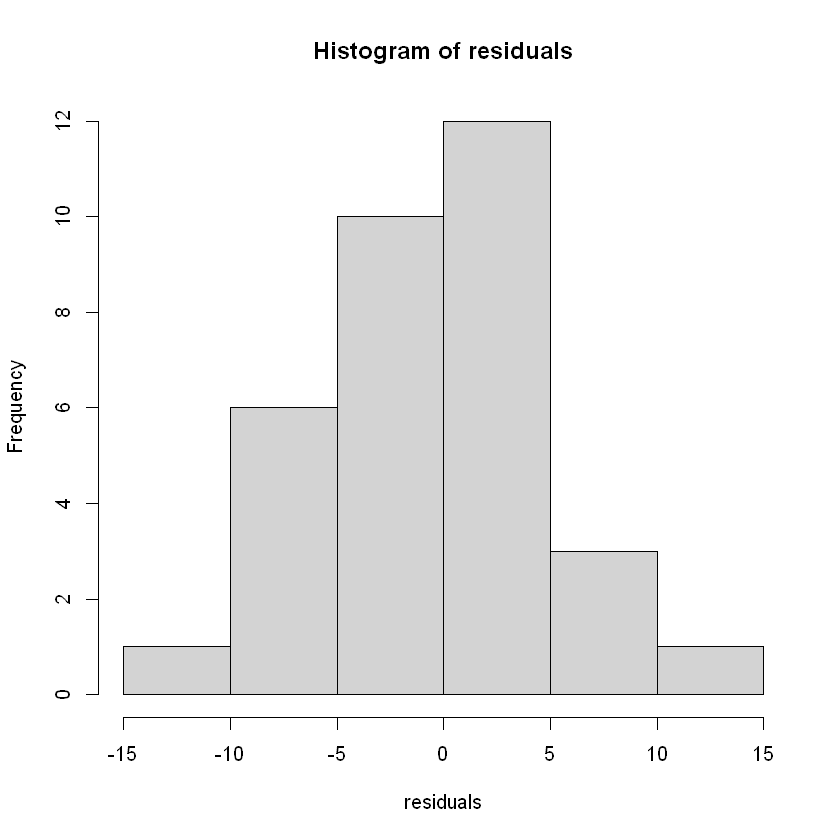

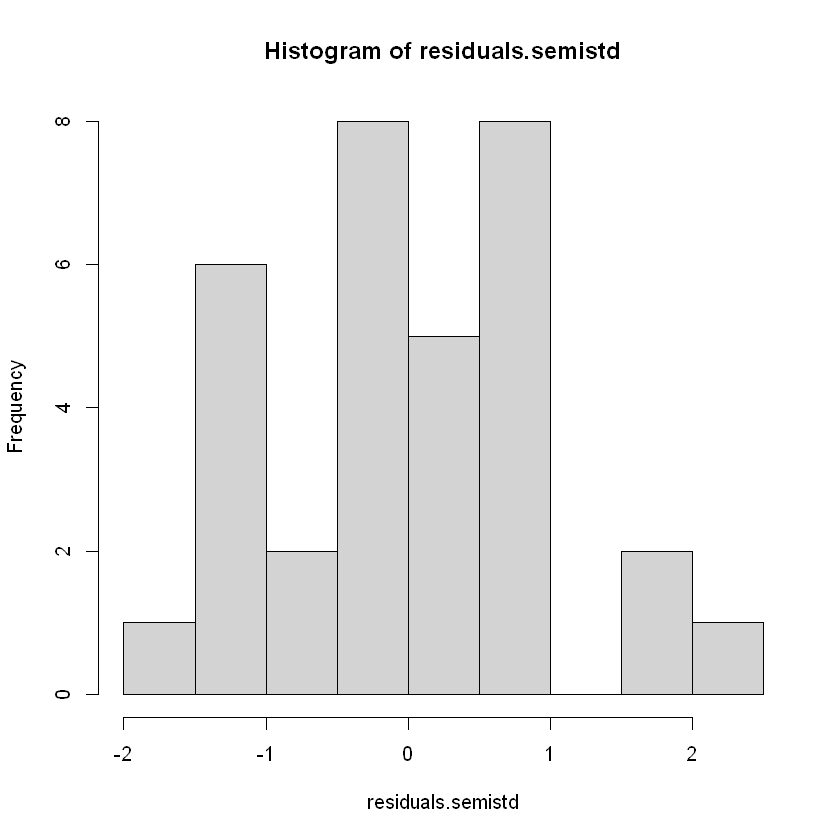

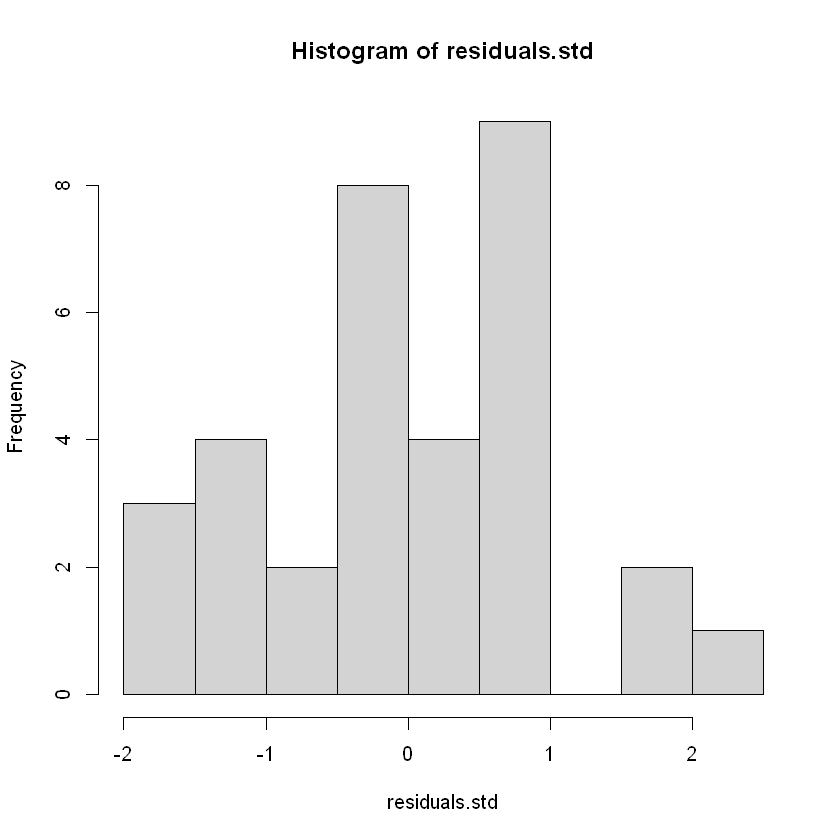

In [8]:
# Obtain the residuals from the ANOVA fit
residuals=anova.fit$residuals;
hist(residuals)
# Semistudentized residuals
residuals.semistd=anova.fit$residuals/sqrt(mse);
hist(residuals.semistd)
# Studentized residuals 
weights=1-1/ns[as.numeric(Spock$Judge)];
residuals.std=anova.fit$residuals/sqrt(mse)/sqrt(weights);
hist(residuals.std)

With residuals, we usually begin the diagnostics with visualizations to explore how the residuals are related with other vairbales.

1. $e^*$ or $r$ v.s. $\hat{Y}_{ij}$
2. $e^*$ or $r$ v.s. indices or other structures 
3. Quantile-Quantile plot or stem-leaf plot 
4. $e^*$ or $r$ v.s. missing variables.
5. ...





  The decimal point is at the |

  -10 | 3
   -8 | 21
   -6 | 61
   -4 | 977
   -2 | 3
   -0 | 66630941
    0 | 4649
    2 | 78014
    4 | 0771
    6 | 
    8 | 54
   10 | 
   12 | 0



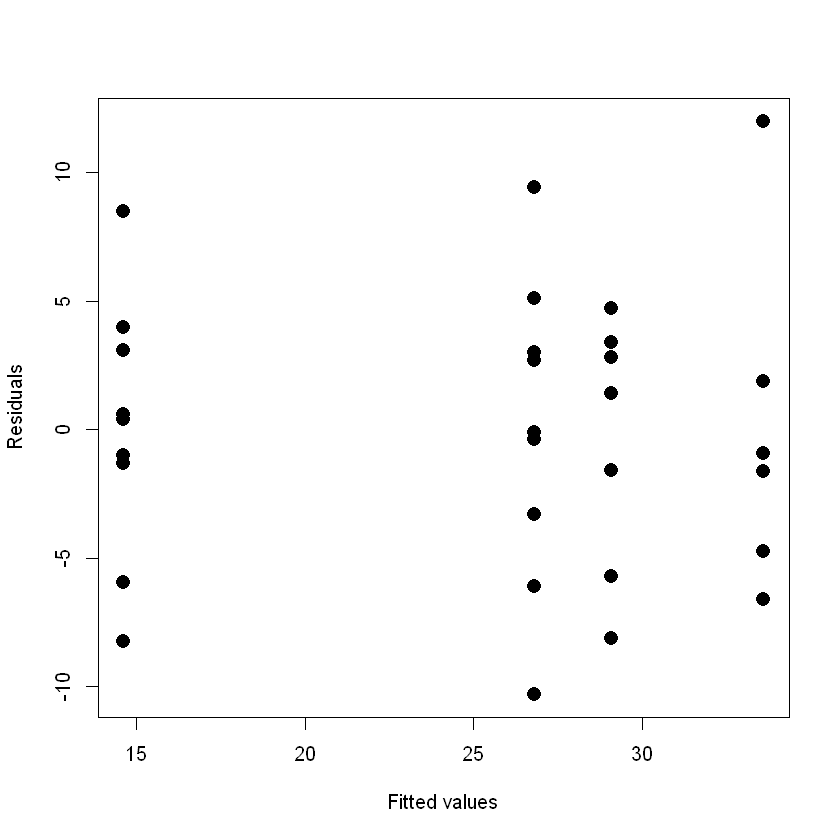

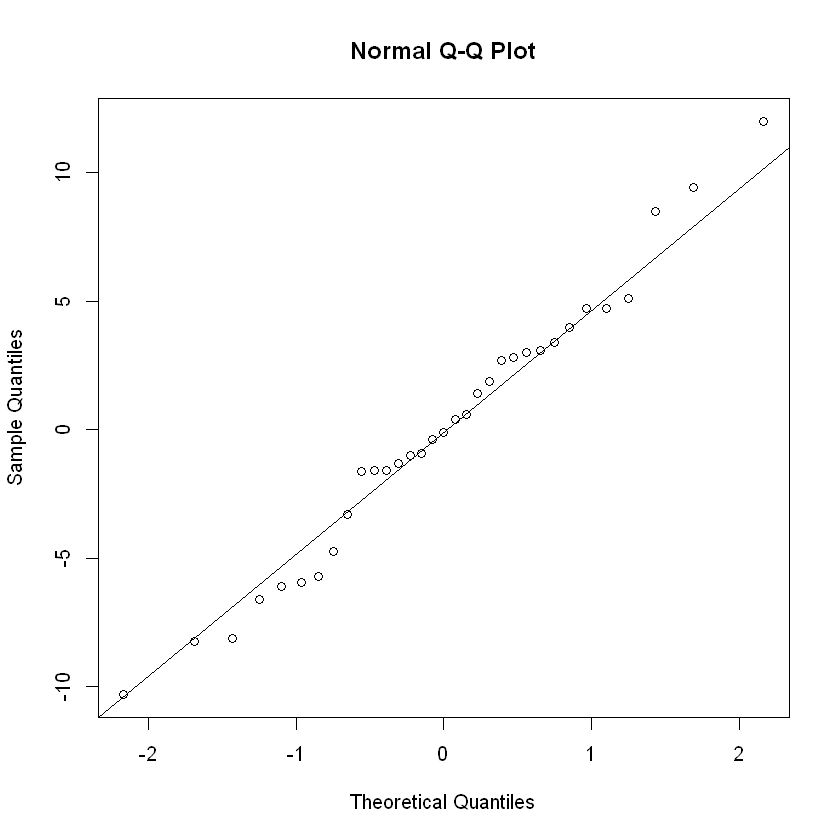

In [9]:
# Plot the residuals (or the other two versions) against fitted values
plot(residuals~anova.fit$fitted.values,type='p',pch=16,cex=1.5,xlab="Fitted values",ylab="Residuals")

# Plot the residual against certain orders
# No clear orders make sense in the Spock trial data

# Stem-leaf plot  (or use histogram, or qq-plot )
stem(residuals)
qqnorm(residuals);qqline(residuals)

# Plot residuals against missing variables
# Not applicable on Spock trial data



### 4.1.10 Testing equal variance 

Estimate $\sigma_1^2,\sigma_2^2,\ldots, \sigma_r^2$ separately as, for $i=1,\ldots, r$, 
\[
s_i^2 = \sum_{j=1}^{n_i} \frac{\big(Y_{ij}-\bar{Y}_{i\cdot}\big)^2}{n_i-1}.
\]
We want to test the null hypothesis $H_0: \sigma_1=\cdots =\sigma_r$ against the alternative $H_a:$ not all $\sigma$s are equal. 


In [10]:
# Calculate the variances for each group:
(vars = tapply(Spock$perc.women,Spock$Judge,var))
alpha=0.05;

1        2        3        4 
25.38944 43.32567 21.09500 35.62750

**Hartley test.** The test statistic is 
\[
H=\frac{\max(s_1^2,\ldots, s_r^2)}{\min(s_1^2,\ldots, s_r^2)}.
\]
At significance level $\alpha$, reject $H_0$ if $H>H(1-\alpha;r,n_i-1)$ when all $n_i$s are the same (balanced design). 

In [11]:
# Hartley test:
H.stat=max(vars)/min(vars);
#install.packages('SuppDists')
library(SuppDists) # The distribution is in this package
# Both df and k only take integers:
qmaxFratio(1-alpha,df=floor(sum(ns)/length(ns)-1),k=length(ns))
qmaxFratio(1-alpha,df=ceiling(sum(ns)/length(ns)-1),k=length(ns))

[1] 8.439993

[1] 7.185323

**Bartlett test.** The test statistics is 
\[
K^2=(n_T-r) \log({\rm MSE})-\sum_{i=1}^r (n_i-1) \log (s_i^2).
\]
We know that $K^2 \geq 0$ from Jensen's inequality. Under $H_0$, $K^2$ is approximately $\chi^2_{r-1}$ assuming that $n_i$ are not small. Reject $H_0$ if $K^2> \chi^2(1-\alpha;r-1)$ at significance level $\alpha$. Related to the likelihood ratio test. 


In [12]:
# Bartlett test:
K.stat= (sum(ns)-length(ns))*log(mse)-sum( (ns-1)*log(vars) );
qchisq(1-alpha,df=length(ns)-1)

[1] 7.814728

**Levene test.** 
1. Create new data with $d_{ij}=|Y_{ij}-\bar{Y}_{i\cdot}|$. 
2. Treat $\{d_{ij}\}$ as response variables
3. Calculate the $F$-statistic for $H_0: \mathbb{E}[d_{1\cdot}]=\mathbb{E}[d_{2\cdot}] = \cdots =\mathbb{E}[d_{r\cdot}]$
Reject $H_0$ if $F^*>F(1-\alpha; r-1, n_T-r)$ at significance level $\alpha$.


In [13]:
# Levene test:
Spock$res.abs=abs(anova.fit$residuals);
summary(aov(res.abs~Judge,data=Spock))

            Df Sum Sq Mean Sq F value Pr(>F)
Judge        3   5.64    1.88   0.173  0.914
Residuals   29 314.70   10.85               

### 4.1.11 Remedies for departures from model assumptions 

**Weighted least squares**

Idea: $\sqrt{w_i}\epsilon_{ij} \sim N(0,1)$ if $w_i = 1/\sigma_i^2$. 

Find weighted least squares estimator by minimizing $\sum_{i=1}^r \sum_{j=1}^{n_i} w_i(Y_{ij}-\mu)^2$ for the common mean 
$\tilde{\mu}=\sum n_i w_i \bar{Y}_{i\cdot}/\sum n_i w_i$. We will have a new set of ${\rm SSTR}$ and ${\rm SSE}$. In the end, we still have $F^* \sim F(r-1,n_T-r)$. 

In practice, we plug in $w_i = 1/s_i^2$, and the null distribution remains the same.





**Rank test**
\[
F^*=\frac{ {\rm MSTR}(R) }{ {\rm MSE} (R)} = \frac{\sum \sum (\bar{R}_{i\cdot }-\bar{R})^2 /(r-1)}{\sum\sum (R_{ij}-\bar{R}_{i\cdot})^2/(n_T-r) } \sim F(r-1, n_T-r),
\]
where $R_{ij}$ is the rank of $Y_{ij}$ among all $n_T$ observations. Works when the sample size is large.


In [14]:
# The rank test
Spock$rank.perc=rank(Spock$perc.women)
summary(aov(rank.perc~Judge,data=Spock))


            Df Sum Sq Mean Sq F value   Pr(>F)    
Judge        3   1846   615.4    15.6 3.15e-06 ***
Residuals   29   1144    39.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**Kruskal-Wallis test**
\[
F^*=(n_T-1)\frac{ \sum_{i=1}^r (\bar{R}_{i\cdot}-\bar{R}_{\cdot \cdot})^2 }{ \sum \sum (R_{ij}-\bar{R}_{\cdot\cdot})^2} \sim \chi^2_{r-1},
\]
if $n_T$ is large. 

In [15]:
# Krusal-Wallis test:
kruskal.test(perc.women~Judge,data=Spock)


	Kruskal-Wallis rank sum test

data:  perc.women by Judge
Kruskal-Wallis chi-squared = 19.757, df = 3, p-value = 0.0001906


**Box-Cox transformation**

\[
 Y(\lambda)=\frac{Y^{\lambda}-1}{\lambda}, 
\]
and $Y(0)\equiv \log(Y)$ for $\lambda=0$. 

To tune the parameter $\lambda$, we can calculate the likelihood $L(\lambda) \equiv  \max_{\mu,\sigma} L(\lambda;\mu,\sigma)$. Then $\lambda^* = \arg \max L(\lambda)$. 

It can be shown that $\max L(\lambda)$ is equivalent to $\min {\rm SSE}[Y^*(\lambda)]$, where
\[
Y^*_{ij}(\lambda)\equiv \begin{cases}
\frac{Y_{ij}^\lambda-1}{\lambda \dot{Y}^\lambda -1} & \lambda\neq 0\\
\dot{Y}\log(Y_{ij}) & \lambda =0
\end{cases},
\]
where $\dot{Y}$ is the geometric mean of $Y$. 

Box-Cox for equal variance amounts to minimize the Bartlett statistics, or other test statistics. We can use the `boxcox()` function in library `MASS` for Box-Cox transformation in `R`. 
